In [22]:
!pip install numpy

In [23]:
!pip install opencv-python

In [24]:
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt

In [25]:
DIR="/content/colorize.py"
prot_path="/content/colorization_deploy_v2.prototxt"
point_path="/content/pts_in_hull (6).npy"
caffe_model="/content/colorization_release_v2.caffemodel"

In [26]:
dnn_net = cv2.dnn.readNetFromCaffe(prot_path,caffe_model)
kernel = np.load(point_path)
Id = dnn_net.getLayerId("class8_ab")
Id2 = dnn_net.getLayerId("conv8_313_rh")
kernel = kernel.transpose().reshape(2,313,1,1)
dnn_net.getLayer(Id).blobs = [kernel.astype("float32")]
dnn_net.getLayer(Id2).blobs = [np.full([1,313],2.606,dtype='float32')]

In [27]:
image = cv2.imread("/content/2880x1800.jpg")
image = image.astype("float32")/255.0
lab = cv2.cvtColor(image,cv2.COLOR_BGR2LAB)

In [28]:
resized = cv2.resize(lab,(500,500))
L = cv2.split(resized)[0]
L -= 50

In [29]:
dnn_net.setInput(cv2.dnn.blobFromImage(L))
ab = dnn_net.forward()[0, :, :, :].transpose((1,2,0))
ab = cv2.resize(ab, (image.shape[1],image.shape[0]))

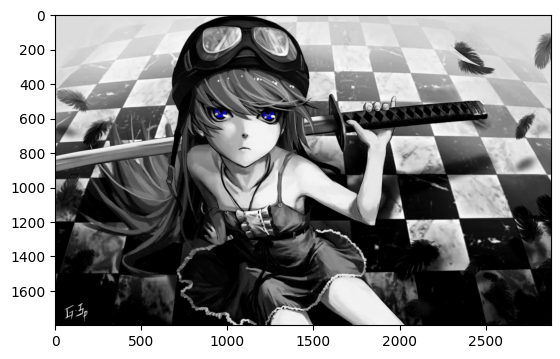

In [30]:
L= cv2.split(lab)[0]
colorized = np.concatenate((L[:,:,np.newaxis], ab), axis=2)
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2RGB)
colorized = np.clip(colorized, 0, 1)
colorized = (255 * colorized).astype("uint8")
plt.imshow(image)

(-0.5, 2879.5, 1799.5, -0.5)

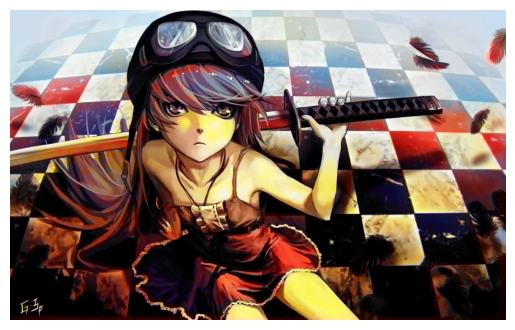

In [31]:
plt.imshow(colorized)
plt.axis('off')